# ADVERTISINIG DATASET

### Import Important Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Reading the "csv" file

In [37]:
file_path = 'Advertising.csv'
data = pd.read_csv(file_path)

In [38]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Drop the "Unnamed: 0" Column

In [39]:
data = data.drop(columns=['Unnamed: 0'])

### Check for missing values

In [40]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Drop the "Sales" column and make new Variable "y" for Predict

In [41]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

### Implement "X" and "y"

In [42]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [43]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

### Split the Dataset To Train and Test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Apply Machine Learning Model (LinearRegression)

In [45]:
model = LinearRegression()

### Fitting the model 

In [46]:
model.fit(X_train, y_train)

LinearRegression()

### model Predicting

In [47]:
y_pred = model.predict(X_test)

### Evaluate the model

In [48]:
mse = mean_squared_error(y_test, y_pred)

In [49]:
r2 = r2_score(y_test, y_pred)

In [50]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3.1740973539761033
R^2 Score: 0.899438024100912


### Visualizing the predictions vs actual values

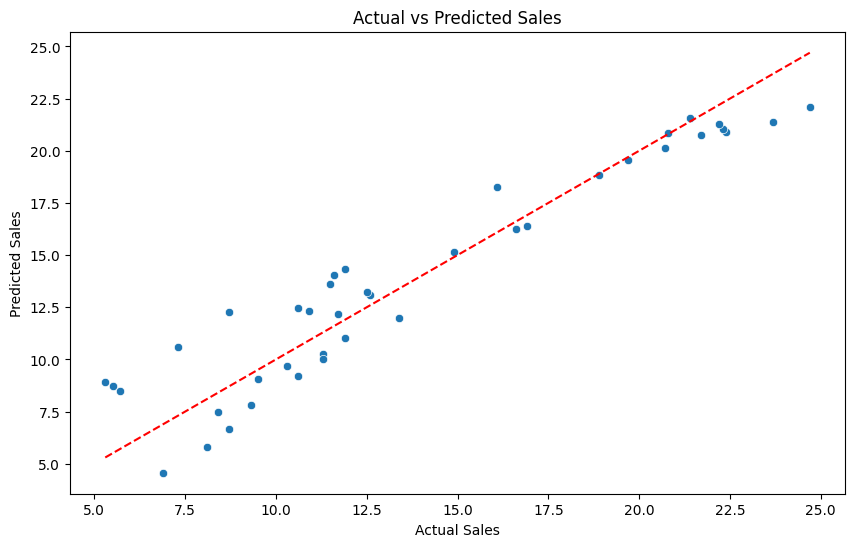

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.show()

### Coefficients of the model

In [52]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


### Visualizing the coefficients

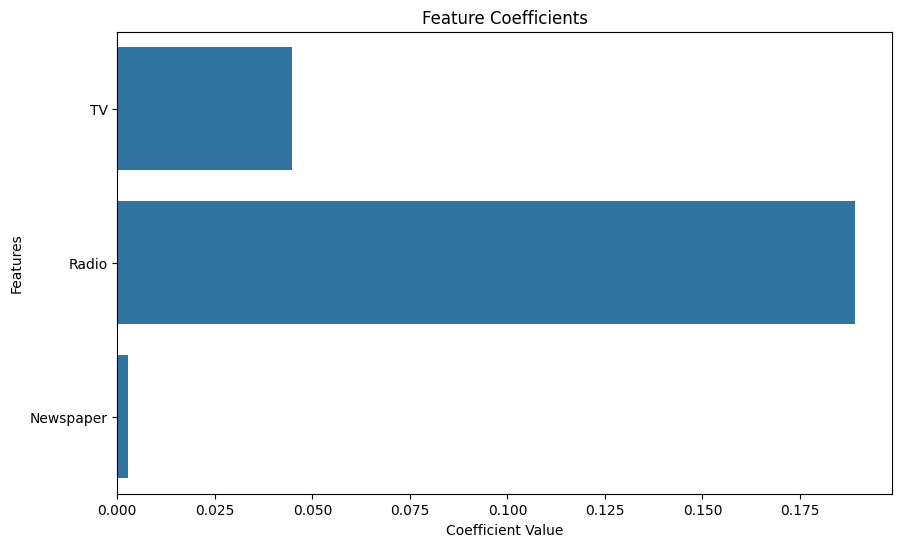

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients['Coefficient'], y=coefficients.index)
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()